In [17]:
!pip install opencv-python-headless tensorflow

In [26]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [42]:
def load_images_and_labels(data_directory):
    images = []
    labels = []
    
    # Loop through all subdirectories in the specified data directory
    for subdir in os.listdir(data_directory):
        subdir_path = os.path.join(data_directory, subdir)
        
        # Check if it's a directory
        if os.path.isdir(subdir_path):
            print(f"Loading images from directory: {subdir_path}")
            for filename in os.listdir(subdir_path):
                if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
                    img_path = os.path.join(subdir_path, filename)
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load image as grayscale
                    
                    # Check if image was loaded successfully
                    if img is not None:
                        img = cv2.resize(img, (128, 32))  # Resize to desired dimensions
                        images.append(img)
                        
                        # Extract label from filename (adjust based on your naming convention)
                        label = filename.split('_')[0]  # Modify this logic based on your naming convention
                        labels.append(label)
                    else:
                        print(f"Warning: Unable to load image {img_path}")
    
    if len(images) == 0:
        print("Error: No images were loaded.")
    if len(labels) == 0:
        print("Error: No labels were found.")

    return np.array(images), np.array(labels)

# Specify the path to your extracted dataset folder (update this path)
extraction_path = 'D:\\ML\\Handwriting DataSet\\Datasets\\data'  # Adjusted path

# Load images and labels from the extracted dataset
images, labels = load_images_and_labels(extraction_path)

# Check number of loaded images and labels
print(f"Loaded {len(images)} images and {len(labels)} labels.")

Loading images from directory: D:\ML\Handwriting DataSet\Datasets\data\000
Loading images from directory: D:\ML\Handwriting DataSet\Datasets\data\001
Loading images from directory: D:\ML\Handwriting DataSet\Datasets\data\002
Loading images from directory: D:\ML\Handwriting DataSet\Datasets\data\003
Loading images from directory: D:\ML\Handwriting DataSet\Datasets\data\004
Loading images from directory: D:\ML\Handwriting DataSet\Datasets\data\005
Loading images from directory: D:\ML\Handwriting DataSet\Datasets\data\006
Loading images from directory: D:\ML\Handwriting DataSet\Datasets\data\007
Loading images from directory: D:\ML\Handwriting DataSet\Datasets\data\008
Loading images from directory: D:\ML\Handwriting DataSet\Datasets\data\009
Loading images from directory: D:\ML\Handwriting DataSet\Datasets\data\010
Loading images from directory: D:\ML\Handwriting DataSet\Datasets\data\011
Loading images from directory: D:\ML\Handwriting DataSet\Datasets\data\012
Loading images from direc

In [44]:
# Normalize images and convert labels to one-hot encoding
images = images.astype('float32') / 255.0  # Normalize pixel values

# Encode labels (you may need to adjust this based on your label set)
unique_labels = np.unique(labels)
label_to_index = {label: index for index, label in enumerate(unique_labels)}
encoded_labels = np.array([label_to_index[label] for label in labels])
num_classes = len(unique_labels)

# Convert labels to one-hot encoding
labels_one_hot_encoded = to_categorical(encoded_labels, num_classes)

# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images.reshape(-1, 32, 128, 1), 
                                                  labels_one_hot_encoded, 
                                                  test_size=0.2,
                                                  random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")

In [50]:
def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))  # Output layer
    
    return model

# Define input shape based on image dimensions (e.g., (32, 128, 1) for grayscale images)
model = create_model((32, 128, 1))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=10,
                    batch_size=32)

print("Training complete!")

Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.0000e+00 - loss: 7.3648 - val_accuracy: 0.0000e+00 - val_loss: 7.3569
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.0000e+00 - loss: 7.3332 - val_accuracy: 0.0000e+00 - val_loss: 7.3881
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.0000e+00 - loss: 7.3259 - val_accuracy: 0.0000e+00 - val_loss: 7.4195
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.0000e+00 - loss: 7.3188 - val_accuracy: 0.0000e+00 - val_loss: 7.4506
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.0000e+00 - loss: 7.3117 - val_accuracy: 0.0000e+00 - val_loss: 7.4815
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.0000e+00 - loss: 7.3057 - val_accuracy: 0.0000e+00 - val_loss: 7.5121
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.0000e+00 - loss: 7.2990 - val_accuracy: 0.0000e+00 - val_loss: 7.5425
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - ac

In [54]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 7.6321
Validation Loss: 7.6320
Validation Accuracy: 0.0000


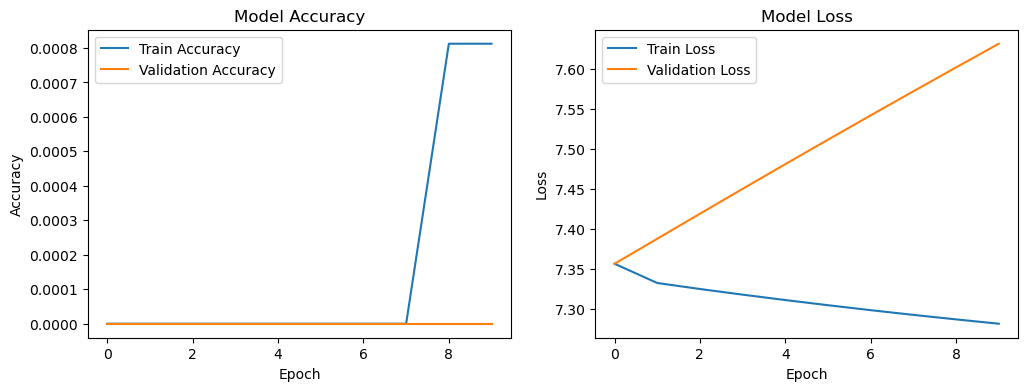

In [56]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

In [58]:
# Function to predict the label of a given image
def predict_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Check if the image was loaded successfully
    if img is None:
        print(f"Error: Unable to load image at {image_path}")
        return None
    
    img = cv2.resize(img, (128, 32))  # Resize to match input shape
    img = img.astype('float32') / 255.0  # Normalize pixel values
    img = img.reshape(1, 32, 128, 1)  # Reshape for model input
    
    prediction = model.predict(img)
    predicted_label = unique_labels[np.argmax(prediction)]
    
    return predicted_label

# Specify the image path
image_path = "F:\\ML\\WhatsApp Image 2024-11-01 at 08.56.35_079064e5.jpg"

# Make a prediction
predicted_label = predict_image(image_path)

# Print the predicted label
if predicted_label is not None:
    print(f'Predicted Label: {predicted_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted Label: a05-080.png


In [60]:
import cv2
import pytesseract

# Set the path to your Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'D:\Tesseract\tesseract.exe'  # Adjust if necessary

# Load the image
image_path = "F:\\ML\\WhatsApp Image 2024-11-01 at 08.56.35_079064e5.jpg"
img = cv2.imread(image_path)

# Check if the image was loaded successfully
if img is None:
    print(f"Error: Unable to load image at {image_path}")
else:
    # Preprocess the image (convert to grayscale and apply thresholding)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

    # Use Tesseract to do OCR on the processed image
    extracted_text = pytesseract.image_to_string(thresh)

    # Print the extracted text
    print("Extracted Text:")
    print(extracted_text)

Extracted Text:
IN TROD? TON.
; ne eB ceatelicg evomrnmertal
Ledwnatogy and carbon credub Rave gamed
Mgaapicomb unitate .

Greonr ledrvretogu Refers tothe wre of puslamoet
hamad , caro cr0cdey Owe ed a moanrtet . cued

Crnrnorns-

Ys awguvarrerd ouptonrsr £h, ofearctior tf Hg ene
ikerelction
wand J green edenes ley aad carbo
dreds, hug hbrabting Aho. neler by fotlring
AnMernahde Atuceymont-

fic ate


